# Question 1: Testing the Guassian Discriminant Class

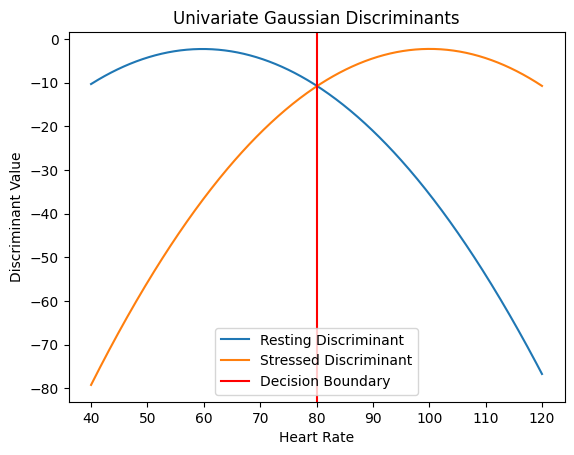

In [1]:
from discriminants import GaussianDiscriminant, MultivariateGaussian
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
resting = np.random.normal(60, 5, 1000)
stressed = np.random.normal(100, 5, 1000)

rmodel = GaussianDiscriminant(resting, prior=0.5, name='Resting')
smodel = GaussianDiscriminant(stressed, prior=0.5, name='Stressed')

xval = np.linspace(40, 120, 500)
rdiscriminant = np.array([rmodel.calc_discriminant(x) for x in xval])
sdiscriminant = np.array([smodel.calc_discriminant(x) for x in xval])

plt.plot(xval, rdiscriminant, label='Resting Discriminant')
plt.plot(xval, sdiscriminant, label='Stressed Discriminant')
plt.axvline(x=80, color='red', linestyle='-', label='Decision Boundary')
plt.legend()
plt.xlabel('Heart Rate')
plt.ylabel('Discriminant Value')
plt.title('Univariate Gaussian Discriminants')
plt.show()

## 1) State why the two disciminants cross at 80 and why there is a parabolic shape to each discriminant plot

The discriminants $ g_i(x) $ for the resting and stressed classes cross at 80 because this is the Bayes decision boundary. It is the point where both classes have equal probability under the Gaussian model.  

Mathematically, the discriminant function for a univariate Gaussian is as follows

$ g_i(x) = -\frac{(x - \mu_i)^2}{2\sigma_i^2} + \ln P(C_i) $

Since both classes have equal priors (0.5) and equal variance, and the means are 60 and 100, so taking the means into account, the crossing occurs at the midpoint which is,

$ \frac{60 + 100}{2} = 80 $

This is where both class probabilities are equal, so it serves as the decision boundary.

The parabolic shape of the discriminant function is due to one of it's terms,

$ -\frac{(x - \mu)^2}{2\sigma^2} $

which is a negative quadratic function meaning a downward-facing parabola. The peak of each parabola is at its respective class mean which is 60 for resting, 100 for stressed, and it decreases symmetrically on either side.

# Question 2: Tesing Multivariate Guassian Discriminant Class

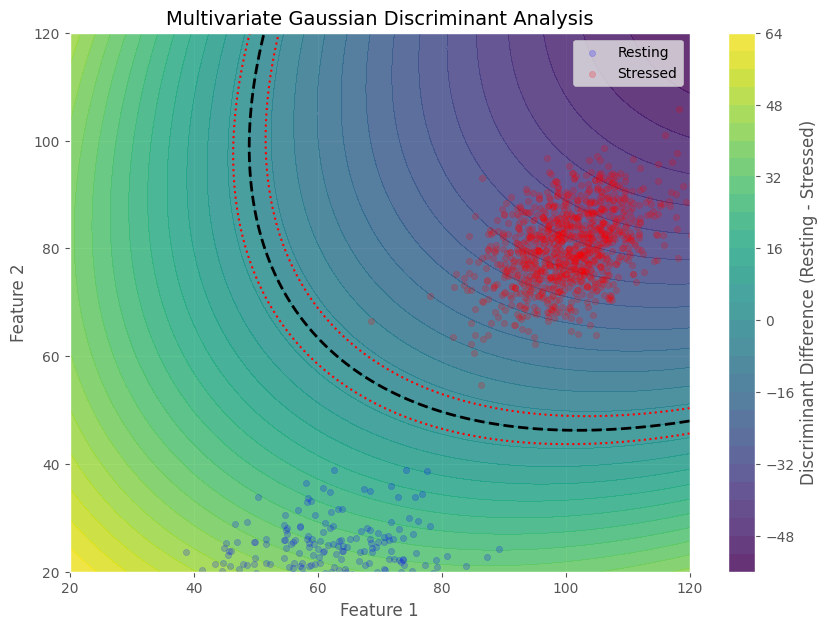

In [2]:
np.random.seed(0)
rmu = [60, 10]
rsigma = [[100, 20], [20, 100]]
resting = np.random.multivariate_normal(rmu, rsigma, 1000)

smu = [100, 80]
ssigma = [[50, 20], [20, 50]]
stressed = np.random.multivariate_normal(smu, ssigma, 1000)

rmodel = MultivariateGaussian(resting, prior=0.5, name='Resting')
smodel = MultivariateGaussian(stressed, prior=0.5, name='Stressed')

xval = np.linspace(20, 120, 100)
yval = np.linspace(20, 120, 100)
X, Y = np.meshgrid(xval, yval)
gp = np.column_stack([X.ravel(), Y.ravel()])

rdiscriminants = np.array([rmodel.calc_discriminant(x) for x in gp]).reshape(100, 100)
sdiscriminants = np.array([smodel.calc_discriminant(x) for x in gp]).reshape(100, 100)

db = rdiscriminants - sdiscriminants

plt.figure(figsize=(10, 7))
plt.style.use("ggplot")
contour = plt.contourf(X, Y, db, levels=30, cmap="viridis", alpha=0.8)
plt.colorbar(contour, label="Discriminant Difference (Resting - Stressed)")
plt.contour(X, Y, db, levels=[0], colors='black', linewidths=2, linestyles='dashed')
threshold = 3
plt.contour(X, Y, db, levels=[-threshold, threshold], colors='red', linewidths=1.5, linestyles='dotted')
plt.scatter(resting[:, 0], resting[:, 1], color='blue', alpha=0.2, s=20, label='Resting')
plt.scatter(stressed[:, 0], stressed[:, 1], color='red', alpha=0.2, s=20, label='Stressed')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Multivariate Gaussian Discriminant Analysis', fontsize=14)
plt.legend()
plt.xlim(20, 120)
plt.ylim(20, 120)
plt.show()

# Question 3: Testing the Discriminant Classifier Class

• Is your code usable for more than 2 classes?

Yes, it is useful for more than two classes as the fit function in the discriminant class takes the unique values in y and it is not hard coded labelling. So if the number of unique values are more than 2, it still performs the function.

• How do you pool variances together?

Pooling variances means that we pool the covariance matrices of different classes to estimate the shared covariance matrix. Here we assume that all classes share the same covariance matrix. We pool this by weighing the class-specific covariances based on the number of samples in each class. The formula is

Where $ \Sigma_k = \frac{1}{N - K} \sum_{k=1}^{K} (N_k - 1) \Sigma_k $

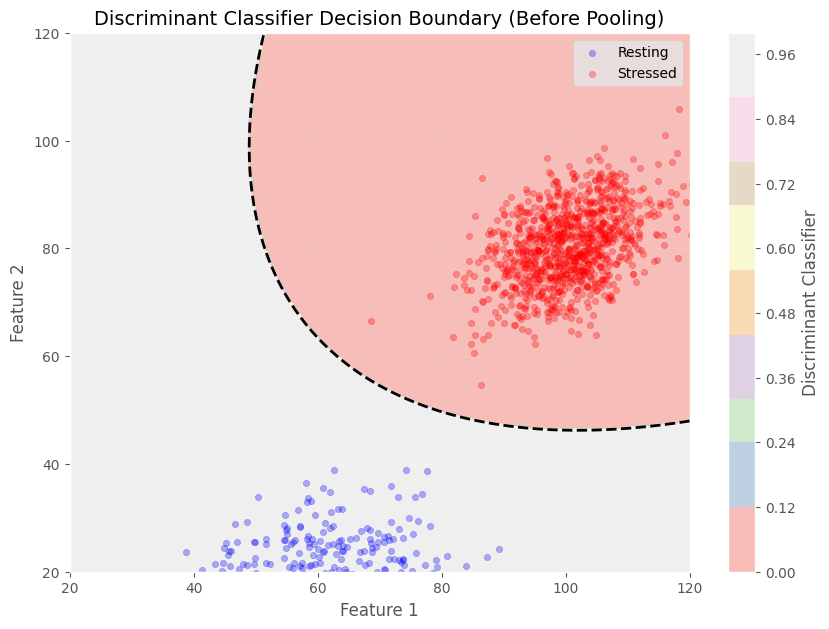

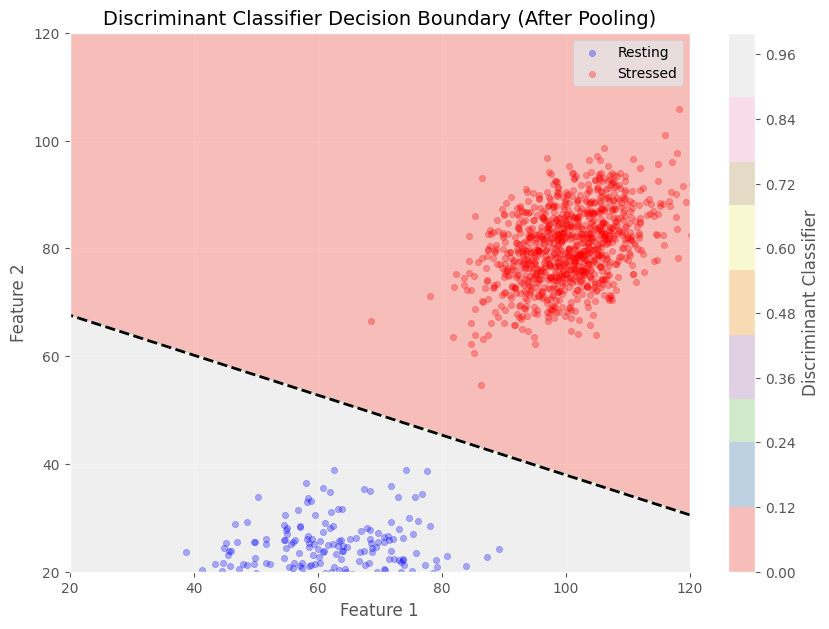

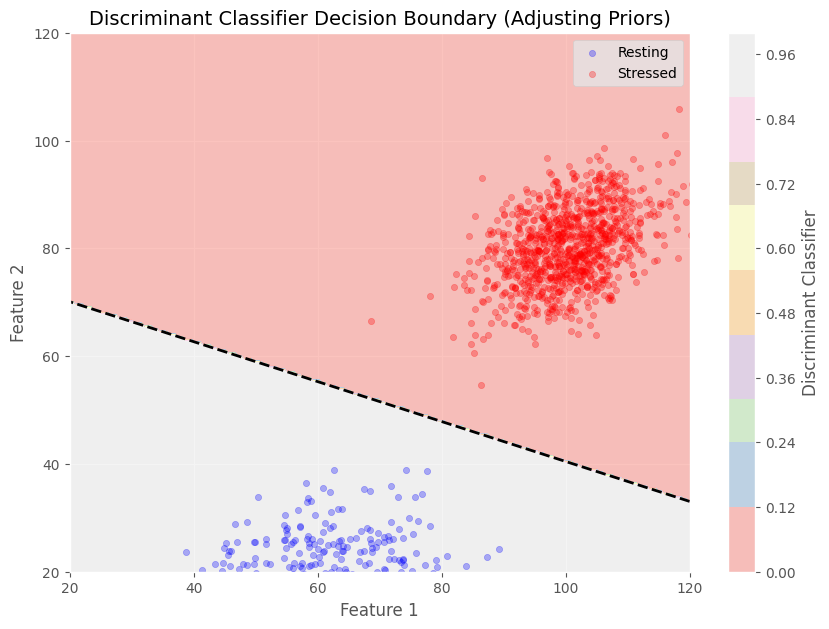

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from classifiers1 import DiscriminantClassifier

rmodel = MultivariateGaussian(resting, prior=0.5, name='Resting')
smodel = MultivariateGaussian(stressed, prior=0.5, name='Stressed')
classifier = DiscriminantClassifier()
classifier.set_classes(rmodel, smodel)

xval = np.linspace(20, 120, 200)
yval = np.linspace(20, 120, 200)
X, Y = np.meshgrid(xval, yval)
gp = np.column_stack([X.ravel(), Y.ravel()])

dmap = np.array([classifier.predict(x) == 'Resting' for x in gp]).reshape(200, 200)
rdiscriminants = np.array([rmodel.calc_discriminant(x) for x in gp]).reshape(200, 200)
sdiscriminants = np.array([smodel.calc_discriminant(x) for x in gp]).reshape(200, 200)
db = rdiscriminants - sdiscriminants

plt.figure(figsize=(10, 7))
plt.style.use("ggplot")
contour = plt.contourf(X, Y, dmap, levels=30, cmap="Pastel1", alpha=0.8)
plt.colorbar(contour, label="Discriminant Classifier")
plt.scatter(resting[:, 0], resting[:, 1], color='blue', alpha=0.3, s=20, label='Resting')
plt.scatter(stressed[:, 0], stressed[:, 1], color='red', alpha=0.3, s=20, label='Stressed')
plt.contour(X, Y, db, levels=[0], colors='black', linewidths=2, linestyles='dashed')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Discriminant Classifier Decision Boundary (Before Pooling)', fontsize=14)
plt.legend()
plt.xlim(20, 120)
plt.ylim(20, 120)
plt.show()

classifier.pool_variances()
pooledmap = np.array([classifier.predict(x) == 'Resting' for x in gp]).reshape(200, 200)
rdiscriminants = np.array([rmodel.calc_discriminant(x) for x in gp]).reshape(200, 200)
sdiscriminants = np.array([smodel.calc_discriminant(x) for x in gp]).reshape(200, 200)
db = rdiscriminants - sdiscriminants

plt.figure(figsize=(10, 7))
plt.style.use("ggplot")
contour = plt.contourf(X, Y, pooledmap, levels=30, cmap="Pastel1", alpha=0.8)
plt.colorbar(contour, label="Discriminant Classifier")
plt.scatter(resting[:, 0], resting[:, 1], color='blue', alpha=0.3, s=20, label='Resting')
plt.scatter(stressed[:, 0], stressed[:, 1], color='red', alpha=0.3, s=20, label='Stressed')
plt.contour(X, Y, db, levels=[0], colors='black', linewidths=2, linestyles='dashed')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Discriminant Classifier Decision Boundary (After Pooling)', fontsize=14)
plt.legend()
plt.xlim(20, 120)
plt.ylim(20, 120)
plt.show()

rmodel.params['prior'] = 0.9
smodel.params['prior'] = 0.1

classifier.set_classes(rmodel, smodel)
classifier.pool_variances()
dmapPriors = np.array([classifier.predict(x) == 'Resting' for x in gp]).reshape(X.shape)
rdiscriminants = np.array([rmodel.calc_discriminant(x) for x in gp]).reshape(X.shape)
sdiscriminants = np.array([smodel.calc_discriminant(x) for x in gp]).reshape(X.shape)
db = rdiscriminants - sdiscriminants

plt.figure(figsize=(10, 7))
plt.style.use("ggplot")
contour = plt.contourf(X, Y, dmapPriors, levels=30, cmap="Pastel1", alpha=0.8)
plt.colorbar(contour, label="Discriminant Classifier")
plt.scatter(resting[:, 0], resting[:, 1], color='blue', alpha=0.3, s=20, label='Resting')
plt.scatter(stressed[:, 0], stressed[:, 1], color='red', alpha=0.3, s=20, label='Stressed')
plt.contour(X, Y, db, levels=[0], colors='black', linewidths=2, linestyles='dashed')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Discriminant Classifier Decision Boundary (Adjusting Priors)', fontsize=14)
plt.legend()
plt.xlim(20, 120)
plt.ylim(20, 120)
plt.show()

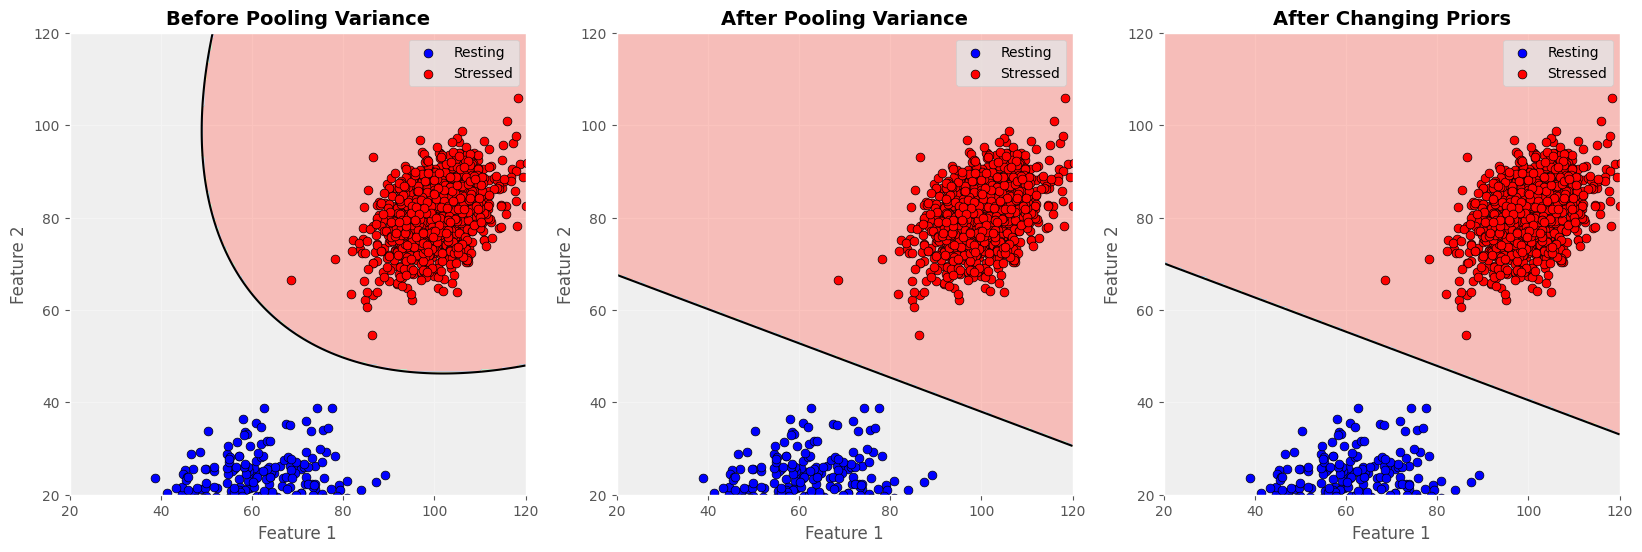

In [4]:
rmodel = MultivariateGaussian(resting, prior=0.5, name='Resting')
smodel = MultivariateGaussian(stressed, prior=0.5, name='Stressed')

classifier = DiscriminantClassifier()
classifier.set_classes(rmodel, smodel)

xval = np.linspace(20, 120, 200)
yval = np.linspace(20, 120, 200)
X, Y = np.meshgrid(xval, yval)
gp = np.column_stack([X.ravel(), Y.ravel()])

beforeDmap = np.array([classifier.predict(x) == 'Resting' for x in gp]).reshape(X.shape)
rdiscriminants = np.array([rmodel.calc_discriminant(x) for x in gp]).reshape(X.shape)
sdiscriminants = np.array([smodel.calc_discriminant(x) for x in gp]).reshape(X.shape)
dbbefore = rdiscriminants - sdiscriminants

classifier.pool_variances()
pooledmap = np.array([classifier.predict(x) == 'Resting' for x in gp]).reshape(X.shape)
rdiscriminants = np.array([rmodel.calc_discriminant(x) for x in gp]).reshape(X.shape)
sdiscriminants = np.array([smodel.calc_discriminant(x) for x in gp]).reshape(X.shape)
dbpool = rdiscriminants - sdiscriminants

rmodel.params['prior'] = 0.9
smodel.params['prior'] = 0.1
classifier.set_classes(rmodel, smodel)
classifier.pool_variances()
dmapPriors = np.array([classifier.predict(x) == 'Resting' for x in gp]).reshape(X.shape)
rdiscriminants = np.array([rmodel.calc_discriminant(x) for x in gp]).reshape(X.shape)
sdiscriminants = np.array([smodel.calc_discriminant(x) for x in gp]).reshape(X.shape)
dbPrior = rdiscriminants - sdiscriminants

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
titles = [
    "Before Pooling Variance",
    "After Pooling Variance",
    "After Changing Priors"
]
dmaps = [beforeDmap, pooledmap, dmapPriors]
db = [dbbefore, dbpool, dbPrior]
colors = ["#6fa3ef", "#ef6f6f"]

for i, ax in enumerate(axes):
    contour = ax.contourf(X, Y, dmaps[i], levels=30, cmap="Pastel1", alpha=0.8)
    ax.contour(X, Y, db[i], levels=[0], colors="black", linewidths=1.5)
    ax.scatter(resting[:, 0], resting[:, 1], color="blue", edgecolors="black", s=40, label="Resting")
    ax.scatter(stressed[:, 0], stressed[:, 1], color="red", edgecolors="black", s=40, label="Stressed")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title(titles[i], fontsize=14, fontweight="bold")
    ax.legend()
    ax.set_xlim(20, 120)
    ax.set_ylim(20, 120)

plt.show()

# Observations derived from comparing the three maps

In the first map, before applying Pooling variance, the graph is very similar to the graph in second question which means Multivariate Guassian is being performed correctly.

In the second map, we can see a significant difference. Here the decision boundary is a straight line while the decision boundary in the first graphh is a curve. This is because of the pooling variance. Pooling variance basically means that the two distributions variance becomes the same. So we will have a linear discriminant analysis and not a quadratic discriminant analysis in which they have different covariance. This leads to a straight line boundary. Here the boundary is at an angle because of the difference in the means of the distributions. As the priors are same (0.5), this boundary is based on the features only. So the line is skewed towards lower value "Resting".

In the third map, we can see that even after changing the priors there is just a little difference between the two graphs. This is likely due to the information in priors doesn't have greater effect on the Discriminant function than the effect of the features on the Discriminant function. So it just shifts a little.

# Question 4:

## 4a) Explain why we assume I.I.D. for Maximum Likelihood Estimation (MLE)

There are two reaseons why we assume I.I.D. for Maximum Likelihood Estimation. The first is independence. Here, each data point is assumed to be independent, meaning that one observation does not influence another. This simplifies the likelihood function because we can write the joint probability as the product of individual probabilities. Second one is identically distributed. This means all samples are assumed to come from the same distribution (e.g., Gaussian, Bernoulli). This ensures that we estimate a single set of parameters ( $ (\mu, \sigma) $ for Gaussian) for the entire dataset. So if we don't assume this, we will get a mixture of distributions and it will be a lot more complicated.

This assumption makes the MLE derivation mathematically tractable and ensures that the likelihood function accurately represents the data.

## 4b) Prove the Maximum Likelihood Estimation for a Bernulli Distribution is $ p_0 = \frac{\sum x_i}{N} $

First, we define the Likelihood Function for a Bernoulli distribution:

$ P(x_i | p) = p^{x_i} (1 - p)^{1 - x_i} $

Since we assume I.I.D., the likelihood for $ N $ samples is,

$ L(p) = \prod_{i=1}^{N} p^{x_i} (1 - p)^{1 - x_i} $

Now taking the Log-Likelihood of it,

$ \ln L(p) = \sum_{i=1}^{N} \left[ x_i \ln p + (1 - x_i) \ln (1 - p) \right] $

Computing the Derivative,

$ \frac{d}{dp} \ln L(p) = \frac{d}{dp} (\sum_{i=1}^{N} \left[ x_i \ln p + (1 - x_i) \ln (1 - p) \right]) $

$ \frac{d}{dp} \ln L(p) = \sum_{i=1}^{N} \left[ \frac{x_i}{p} - \frac{1 - x_i}{1 - p} \right] $

Setting it to zero,

$ \sum_{i=1}^{N} \left[ \frac{x_i}{p} - \frac{1 - x_i}{1 - p} \right] = 0 $

$ \sum x_i \frac{1}{p} = \sum (1 - x_i) \frac{1}{1 - p} $

Rearranging it,

$ p \sum 1 = \sum x_i $

Solving for $ p $,

$ p = \frac{\sum x_i}{N} $

## 4c) For each value of Θ, fill in the resulting joint probability in the following table.

We assume $ ( X \sim Bernoulli(\Theta/3)) $, and the observed samples are:  

$ [x_1 = 1, x_2 = 0, x_3 = 0, x_4 = 1] $

Using the Bernoulli probability mass function:

$ P(X = x | \Theta) = \left(\frac{\Theta}{3}\right)^x \left(1 - \frac{\Theta}{3}\right)^{1-x} $

For four independent samples, the joint probability is:

$ P(D | \Theta) = \prod_{i=1}^{4} \left(\frac{\Theta}{3}\right)^{x_i} \left(1 - \frac{\Theta}{3}\right)^{1 - x_i}
$

For the observed samples $ ( [x_1 = 1, x_2 = 0, x_3 = 0, x_4 = 1] ) $, the joint probability becomes:

$ P(D | \Theta) = \left( \frac{\Theta}{3} \right)^{x_1} \left( 1 - \frac{\Theta}{3} \right)^{1 - x_1} \times \left( \frac{\Theta}{3} \right)^{x_2} \left( 1 - \frac{\Theta}{3} \right)^{1 - x_2} \times \left( \frac{\Theta}{3} \right)^{x_3} \left( 1 - \frac{\Theta}{3} \right)^{1 - x_3} \times \left( \frac{\Theta}{3} \right)^{x_4} \left( 1 - \frac{\Theta}{3} \right)^{1 - x_4}
$

Simplifying for each $ ( \Theta ) $:

$ P(D | \Theta) = \left( \frac{\Theta}{3} \right)^{2} \left( 1 - \frac{\Theta}{3} \right)^{2} $

Now computing for each $( \Theta = 0, 1, 2, 3 ) $:

For $( \Theta = 0 ) $:

$ P(D | 0) = \left( \frac{0}{3} \right)^2 \left( 1 - \frac{0}{3} \right)^2 = 0 $

For $ ( \Theta = 1 ) $:

$ P(D | 1) = \left( \frac{1}{3} \right)^2 \left( 1 - \frac{1}{3} \right)^2 = \frac{1}{9} \times \frac{4}{9} = \frac{4}{81} $

For $ ( \Theta = 2 ) $:

$ P(D | 2) = \left( \frac{2}{3} \right)^2 \left( 1 - \frac{2}{3} \right)^2 = \frac{4}{9} \times \frac{1}{9} = \frac{4}{81} $

For $ ( \Theta = 3 ) $:

$ P(D | 3) = \left( \frac{3}{3} \right)^2 \left( 1 - \frac{3}{3} \right)^2 = 1 \times 0 = 0 $

Now we compute for $ (\Theta = 0, 1, 2, 3 ) $:

$
\begin{array}{|c|c|}
\hline
\Theta & P(D | \Theta) \\
\hline
0 & (0/3)^2 (1 - 0/3)^2 = 0 \\
1 & (1/3)^2 (2/3)^2 = \frac{1}{9} \times \frac{4}{9} = \frac{4}{81} \\
2 & (2/3)^2 (1/3)^2 = \frac{4}{9} \times \frac{1}{9} = \frac{4}{81} \\
3 & (3/3)^2 (0/3)^2 = 1 \times 0 = 0 \\
\hline
\end{array}
$